In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv("D://EDA datasets PW skills//heart_failure.csv")

# Display basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

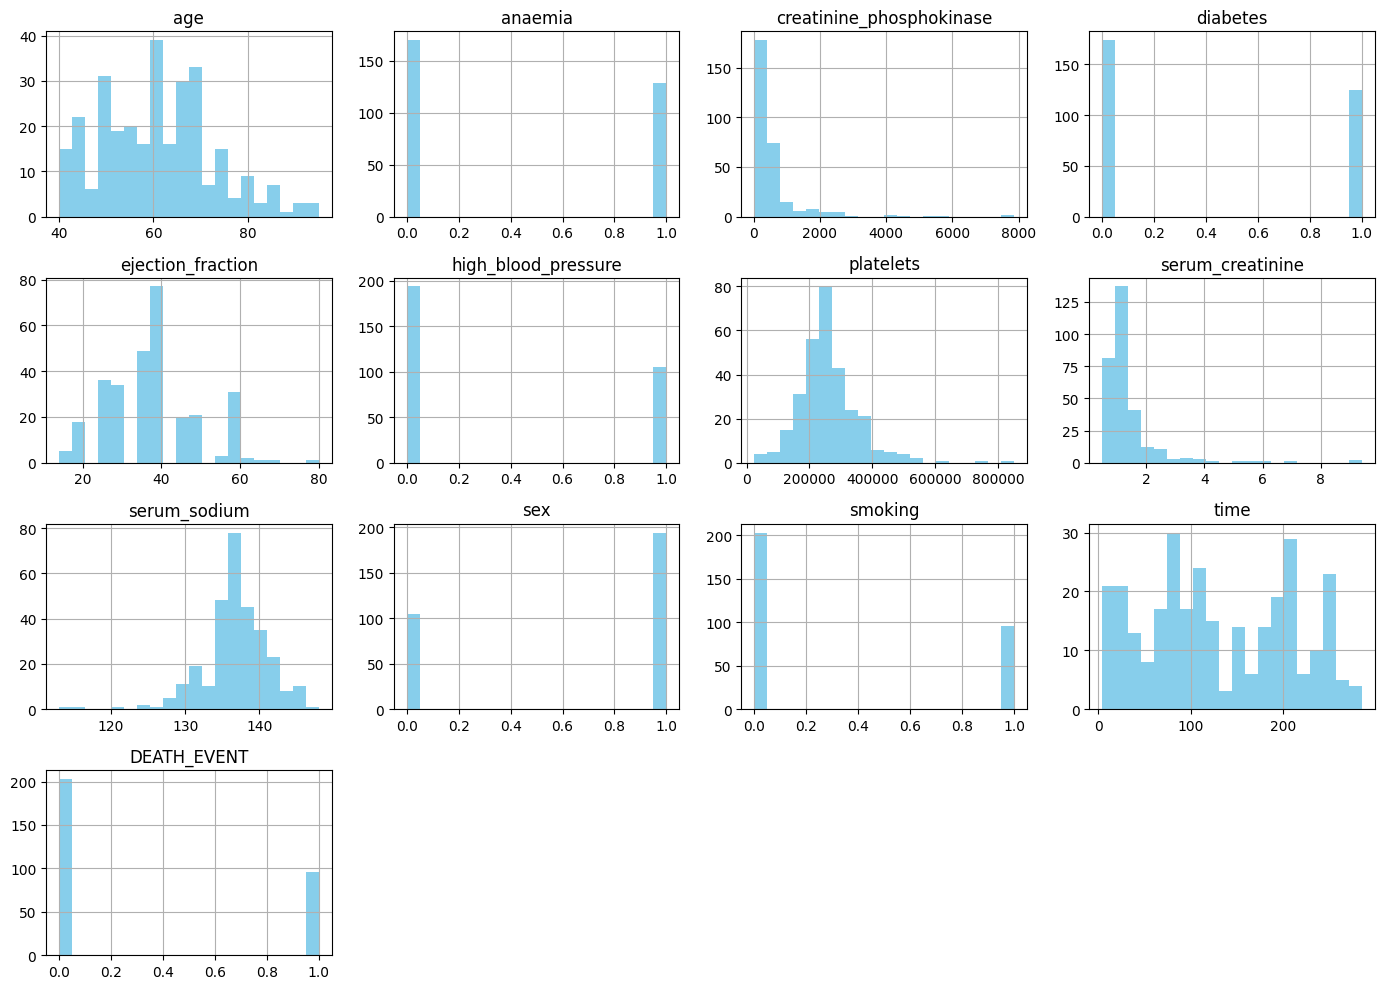

In [20]:
import matplotlib.pyplot as plt

# Setting plot style
df.hist(bins=20, figsize=(14, 10), color='skyblue')
plt.tight_layout()
plt.show()


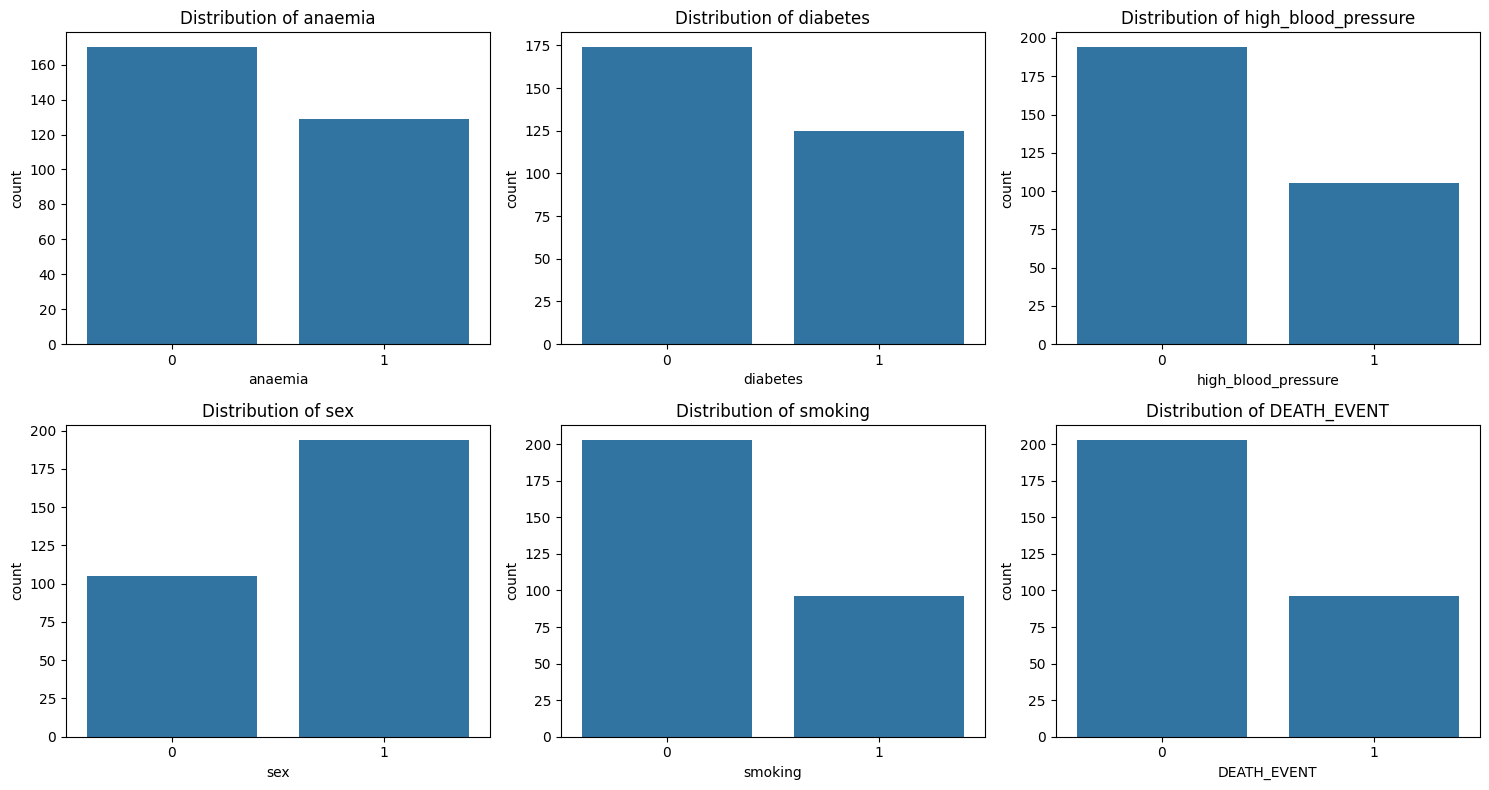

In [18]:
import seaborn as sns

# Categorical columns
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


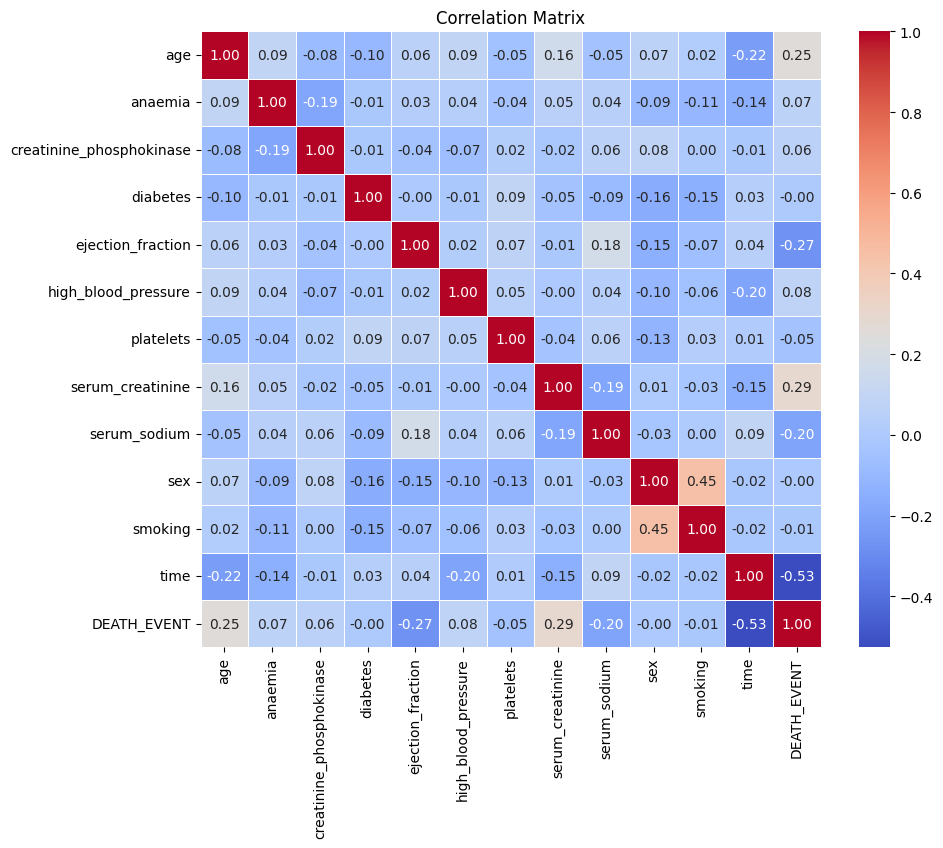

In [22]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


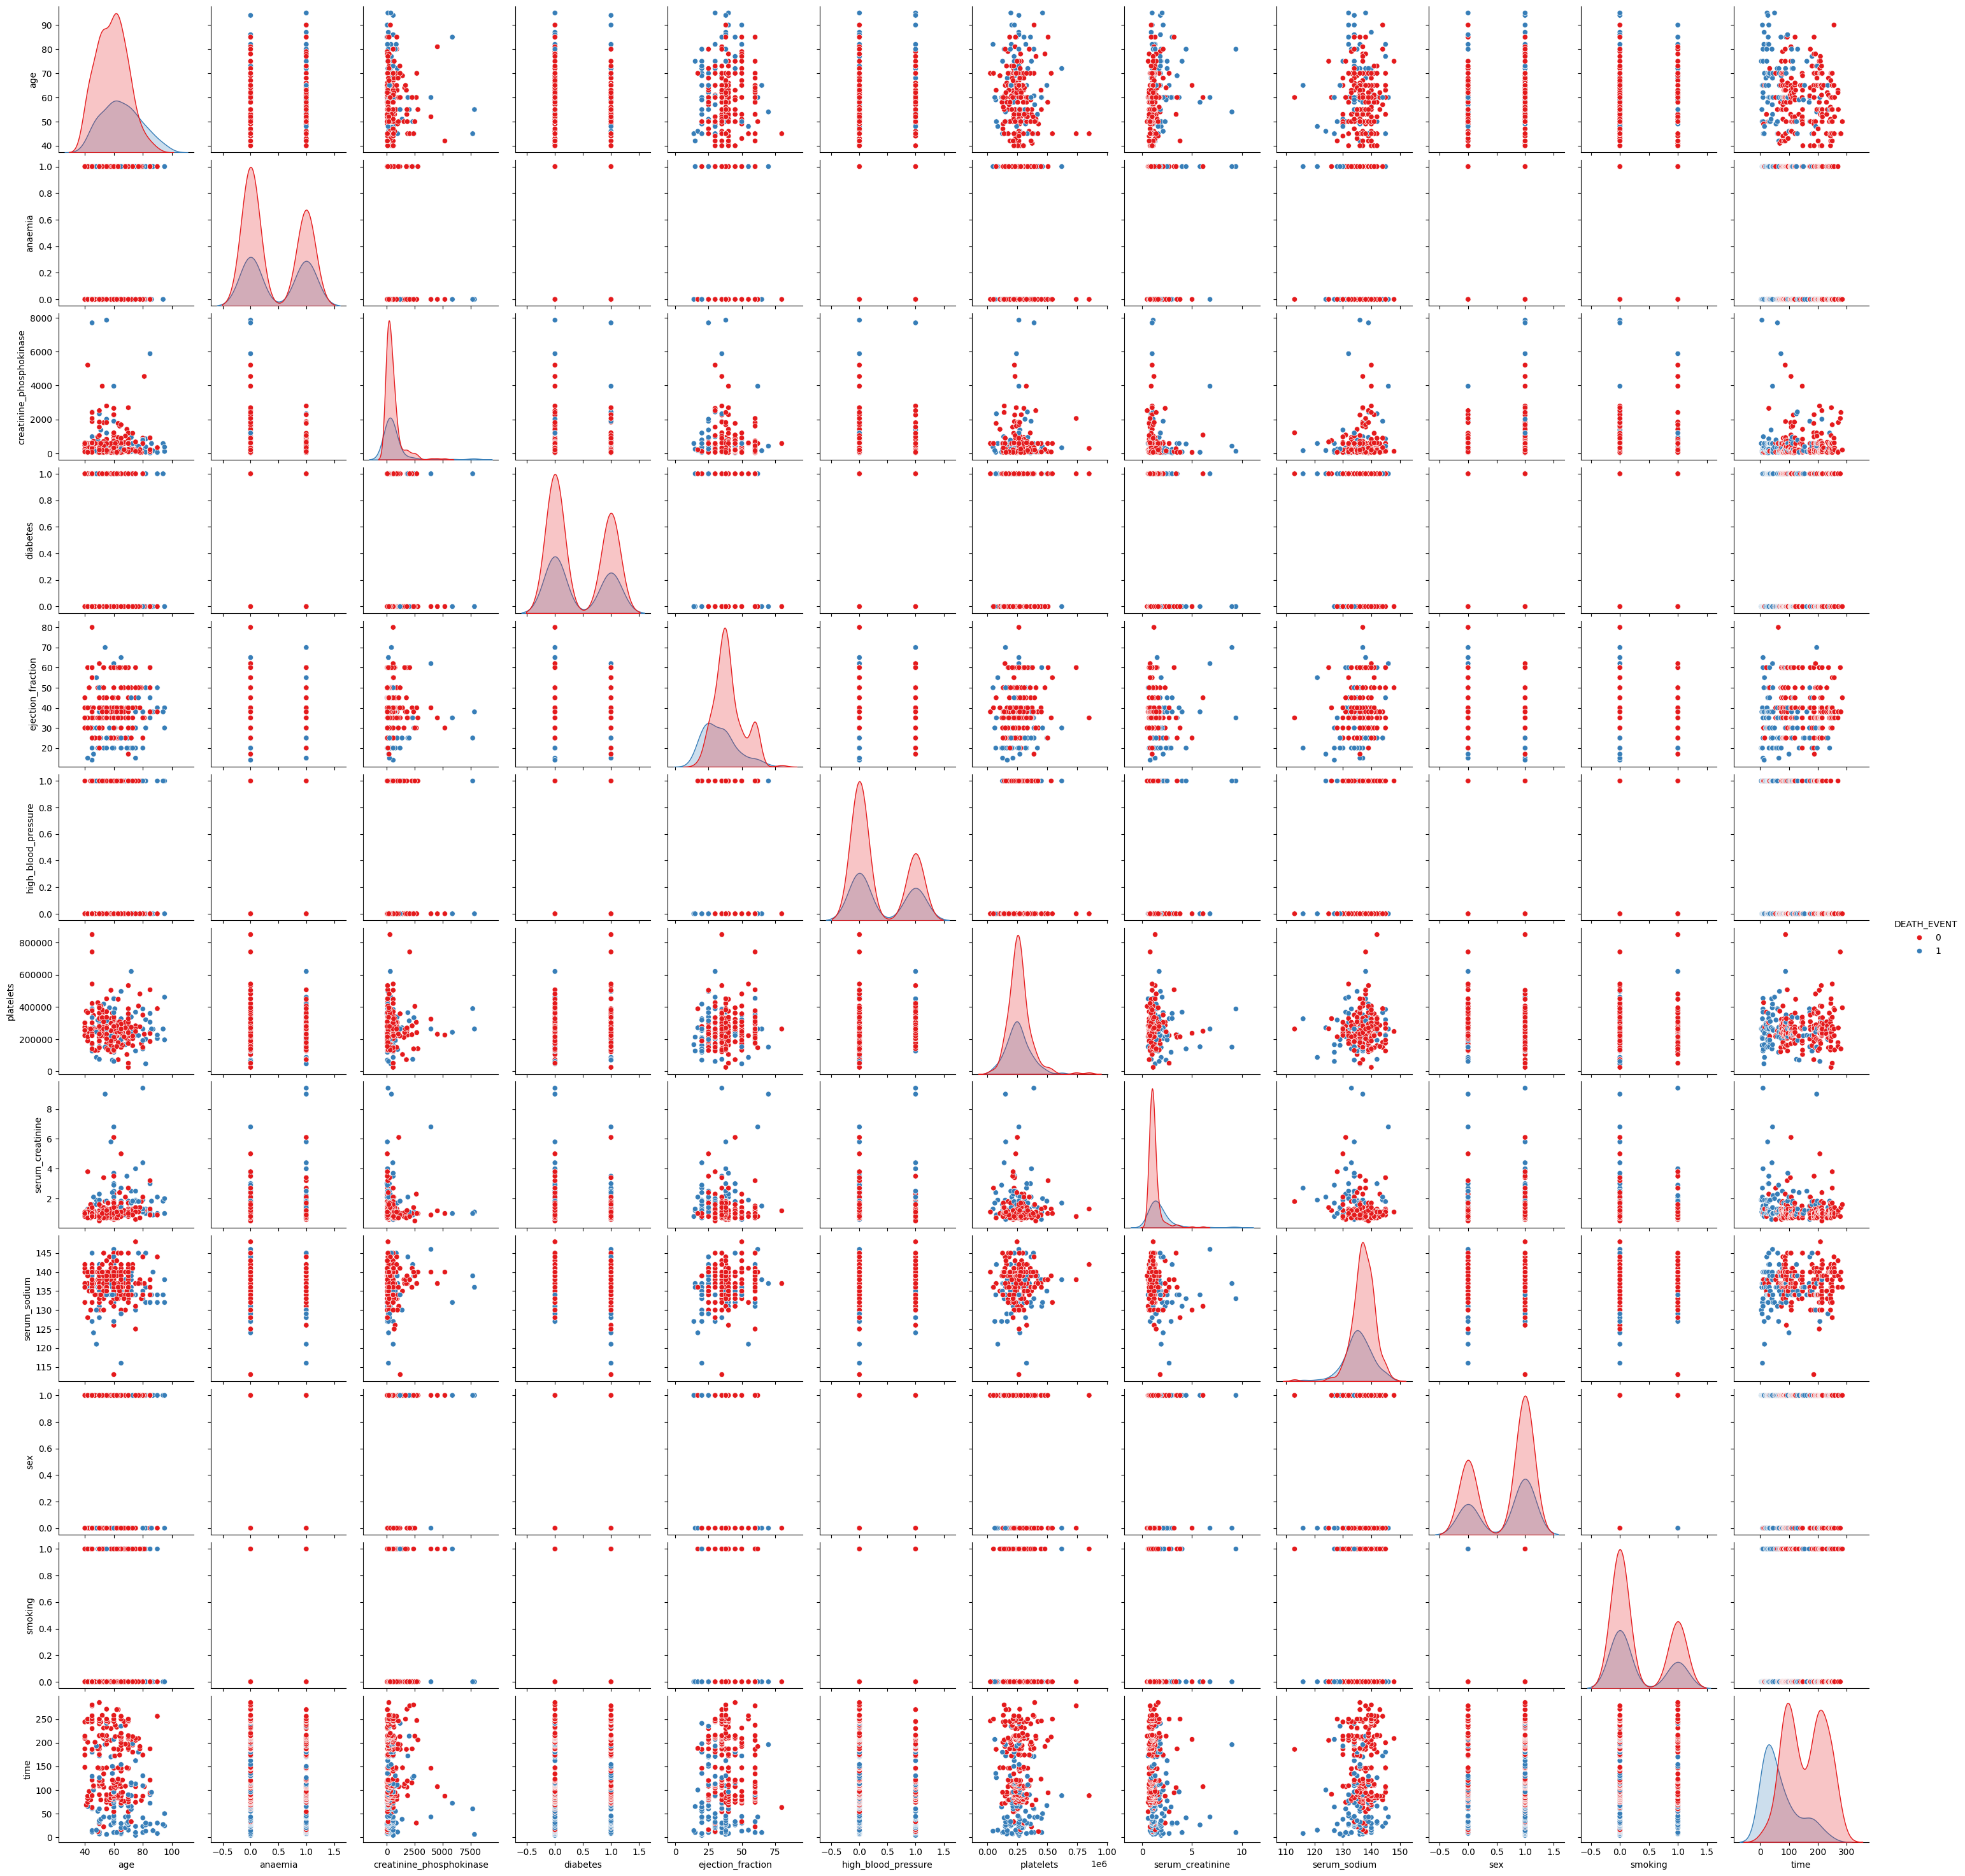

In [32]:
# Pairplot for numerical columns to explore relationships
sns.pairplot(df, hue='DEATH_EVENT', diag_kind='kde', palette='Set1')
plt.show()

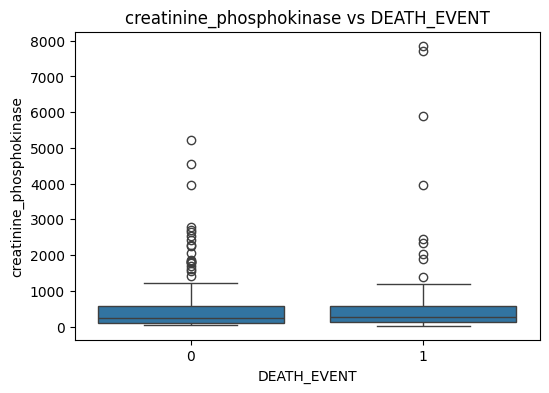

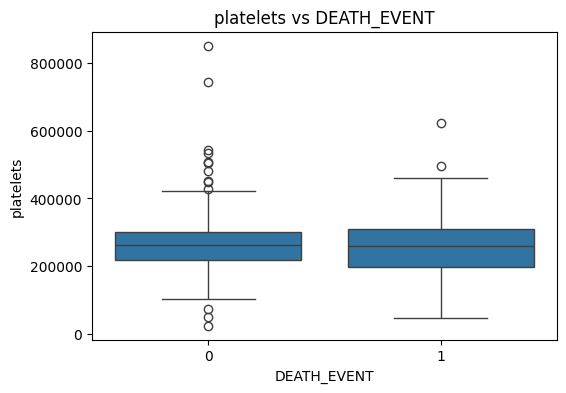

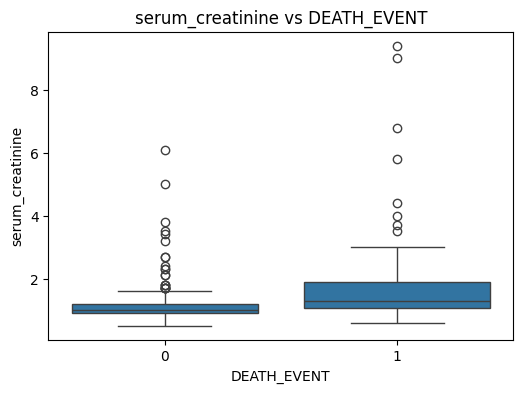

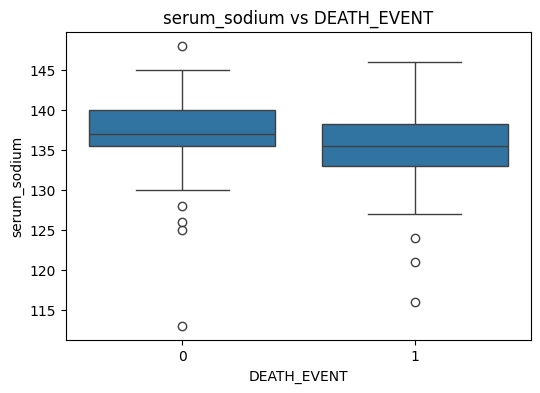

In [33]:
# Boxplots for numerical columns to check for outliers
for col in ['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='DEATH_EVENT',y=col,data=df)
    plt.title(f'{col} vs DEATH_EVENT')
    plt.show()

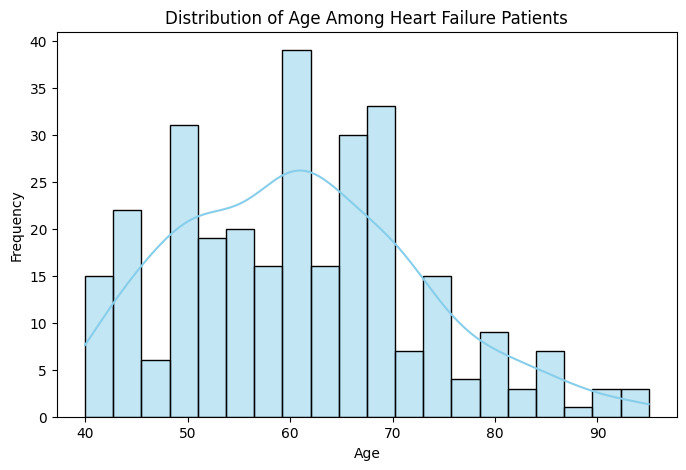

In [36]:
# Distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


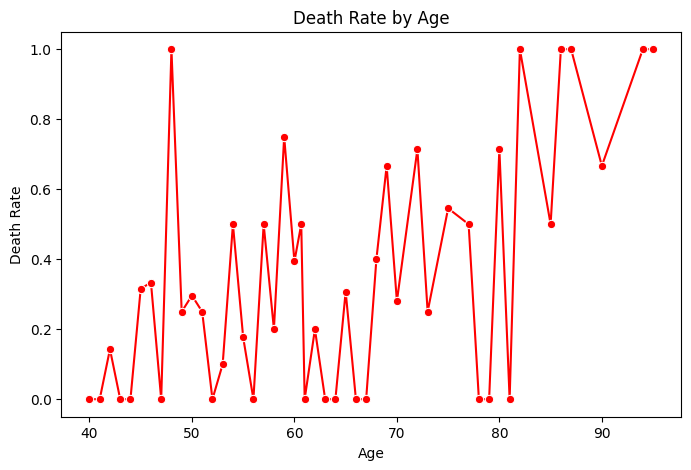

In [38]:
# Grouping data by age and calculating death rate
age_death_rate = df.groupby('age')['DEATH_EVENT'].mean()

# Plotting the death rate by age
plt.figure(figsize=(8, 5))
sns.lineplot(x=age_death_rate.index, y=age_death_rate.values, marker='o', color='red')
plt.title('Death Rate by Age')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.show()


Male patients: 64.88%
Female patients: 35.12%


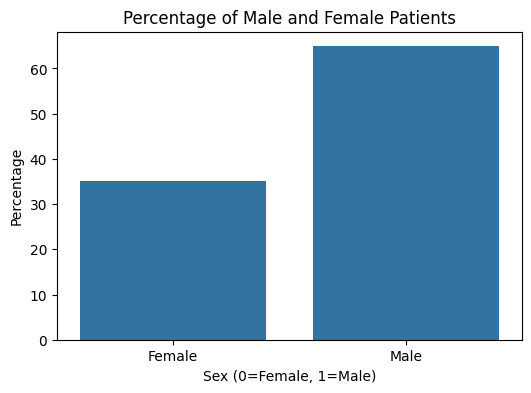

In [42]:
# Calculate percentage of male and female patients
sex_counts = df['sex'].value_counts(normalize=True) * 100

# Display results
male_percentage = sex_counts[1]
female_percentage = sex_counts[0]
print(f"Male patients: {male_percentage:.2f}%")
print(f"Female patients: {female_percentage:.2f}%")

# Bar plot for visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Percentage of Male and Female Patients')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


C:\Users\neela\AppData\Local\Temp\ipykernel_17792\70582415.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='platelets', data=df, palette='Set3')


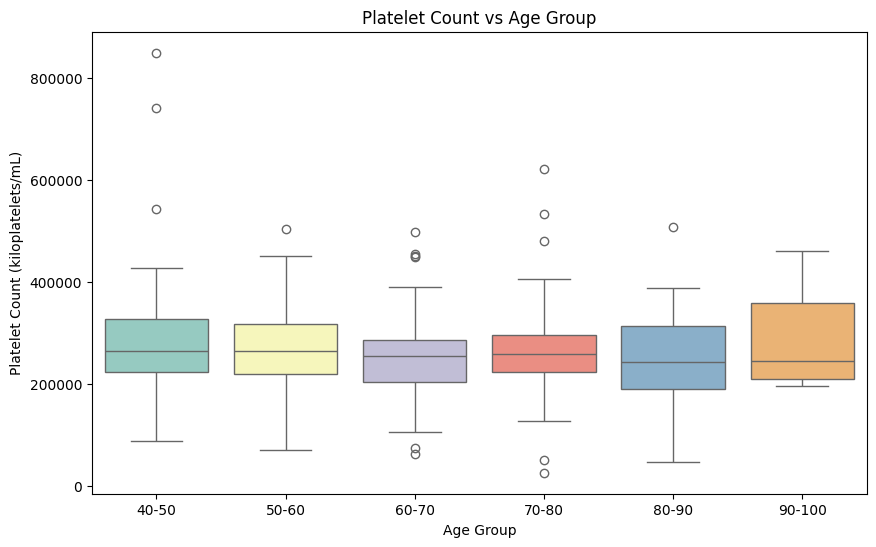

C:\Users\neela\AppData\Local\Temp\ipykernel_17792\70582415.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='platelets', data=age_group_platelets, palette='Set2')


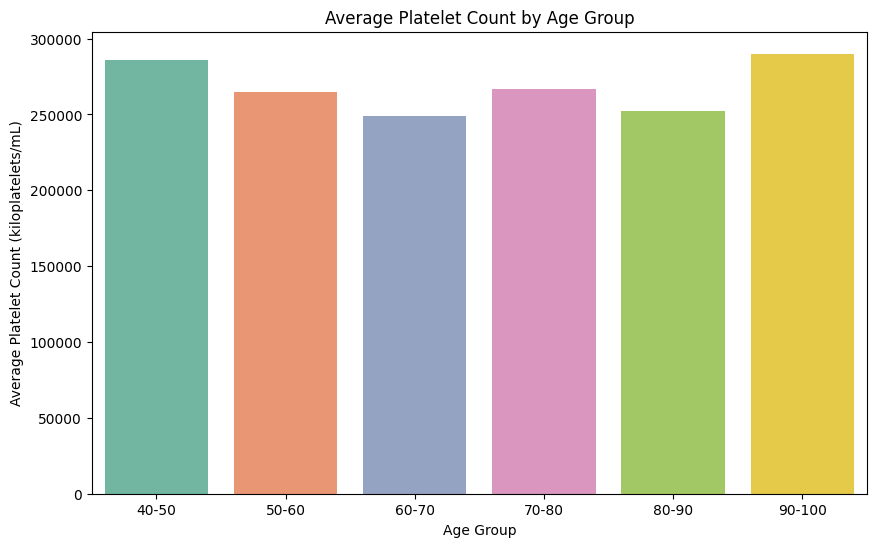

In [44]:
# Create age groups (bins)
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plotting a boxplot to show platelet count distribution for each age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='platelets', data=df, palette='Set3')
plt.title('Platelet Count vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count (kiloplatelets/mL)')
plt.show()

# Alternatively, plot average platelet count by age group
plt.figure(figsize=(10, 6))
age_group_platelets = df.groupby('age_group')['platelets'].mean().reset_index()

# Barplot for average platelet count
sns.barplot(x='age_group', y='platelets', data=age_group_platelets, palette='Set2')
plt.title('Average Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Platelet Count (kiloplatelets/mL)')
plt.show()


Correlation between Serum Creatinine and Serum Sodium: -0.19


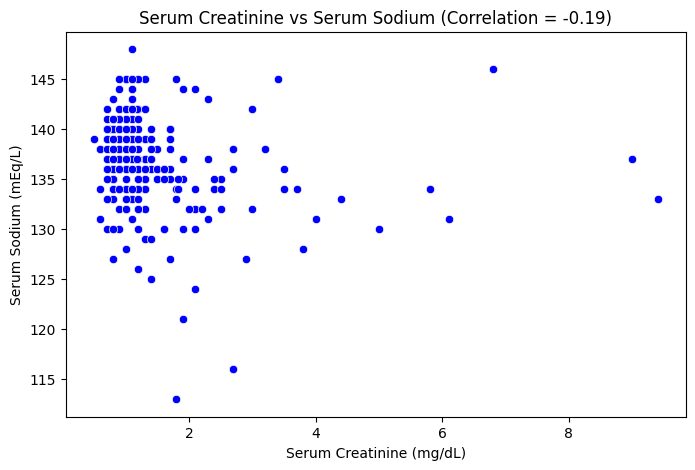

In [46]:
# Calculate the correlation between serum creatinine and serum sodium
correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print(f"Correlation between Serum Creatinine and Serum Sodium: {correlation:.2f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x='serum_creatinine', y='serum_sodium', data=df, color='blue')
plt.title(f'Serum Creatinine vs Serum Sodium (Correlation = {correlation:.2f})')
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Serum Sodium (mEq/L)')
plt.show()


Percentage of Males with High Blood Pressure: 31.44%
Percentage of Females with High Blood Pressure: 41.90%


C:\Users\neela\AppData\Local\Temp\ipykernel_17792\2733945010.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Female', 'Male'], y=high_bp_by_gender.values, palette='Set2')


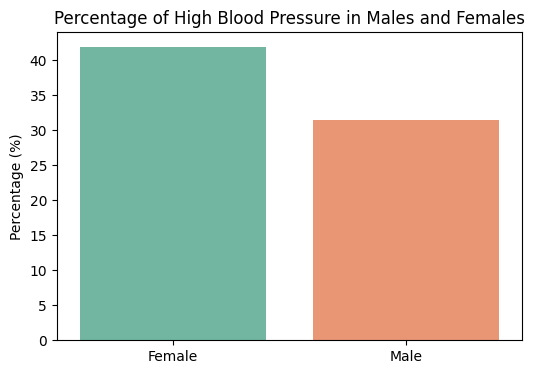

In [48]:
# Group data by sex and high_blood_pressure, then calculate the percentage
high_bp_by_gender = df.groupby('sex')['high_blood_pressure'].mean() * 100

# Print the percentage of high blood pressure in males and females
male_bp = high_bp_by_gender[1]
female_bp = high_bp_by_gender[0]
print(f"Percentage of Males with High Blood Pressure: {male_bp:.2f}%")
print(f"Percentage of Females with High Blood Pressure: {female_bp:.2f}%")

# Bar plot to visualize the comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Female', 'Male'], y=high_bp_by_gender.values, palette='Set2')
plt.title('Percentage of High Blood Pressure in Males and Females')
plt.ylabel('Percentage (%)')
plt.show()


Percentage of Smokers with Heart Failure: 31.25%
Percentage of Non-Smokers with Heart Failure: 32.51%


C:\Users\neela\AppData\Local\Temp\ipykernel_17792\1921035810.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Smokers', 'Smokers'], y=smoking_vs_heart_failure.values, palette='Set2')


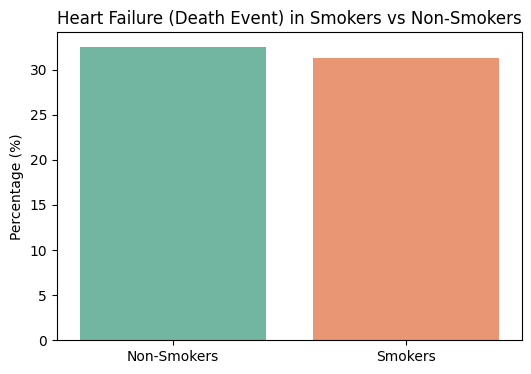

In [50]:
# Grouping data by smoking status and calculating the death event rate (heart failure)
smoking_vs_heart_failure = df.groupby('smoking')['DEATH_EVENT'].mean() * 100

# Print the percentage of heart failure (death event) for smokers and non-smokers
smokers_failure_rate = smoking_vs_heart_failure[1]
non_smokers_failure_rate = smoking_vs_heart_failure[0]
print(f"Percentage of Smokers with Heart Failure: {smokers_failure_rate:.2f}%")
print(f"Percentage of Non-Smokers with Heart Failure: {non_smokers_failure_rate:.2f}%")

# Bar plot to visualize the comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Non-Smokers', 'Smokers'], y=smoking_vs_heart_failure.values, palette='Set2')
plt.title('Heart Failure (Death Event) in Smokers vs Non-Smokers')
plt.ylabel('Percentage (%)')
plt.show()


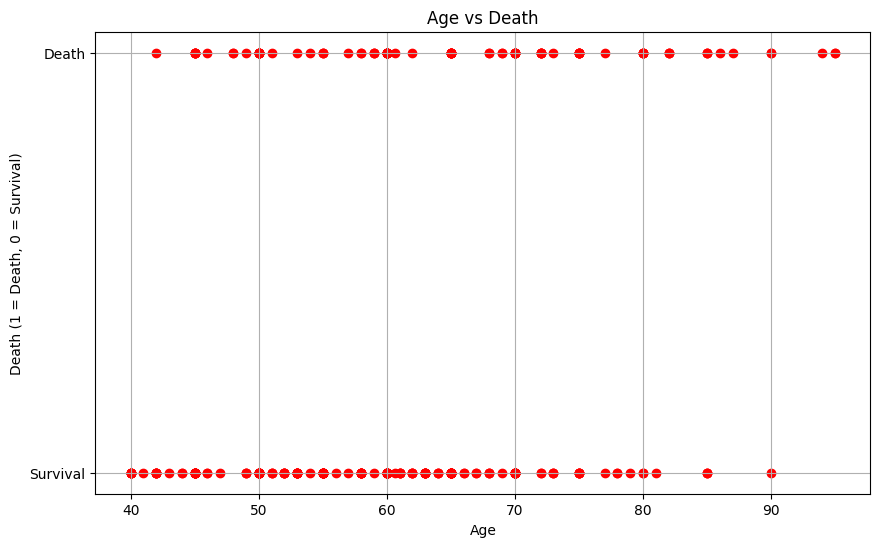

In [54]:
#age vs death 
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['DEATH_EVENT'], color='red', marker='o')
plt.title('Age vs Death')
plt.xlabel('Age')
plt.ylabel('Death (1 = Death, 0 = Survival)')
plt.yticks([0, 1], ['Survival', 'Death'])
plt.grid(True)
plt.show()
